<b>Segundo desafio do curso de Machine Learning CIDAMO</b>
<p>Objetivo: a partir de dados fornecidos, utilizar modelo (SVM, Regressão Logística, KNN ou Naive Beyes) para classificar vinhos quanto à sua qualidade.</p>
<p>Disponibilizado dois arquivos csv, um para treino e outro para teste.</p>



# EDA

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data
df_original=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIDAMO/UNIDADE II/2-desafio-cidamo-2022-2/end_train.csv',sep=',')

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1100 non-null   int64  
 1   fixed acidity         1100 non-null   float64
 2   volatile acidity      1100 non-null   float64
 3   citric acid           1100 non-null   float64
 4   residual sugar        1100 non-null   float64
 5   chlorides             1100 non-null   float64
 6   free sulfur dioxide   1100 non-null   float64
 7   total sulfur dioxide  1100 non-null   float64
 8   density               880 non-null    float64
 9   pH                    880 non-null    float64
 10  sulphates             1100 non-null   float64
 11  alcohol               1100 non-null   float64
 12  quality_bool          1100 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 111.8 KB


- 1100 rows and 13 columns
- Dtype is numeric
-220 missing in density and pH

## Treating Missing

In [4]:
#data missing
df_original.isnull().sum()

Unnamed: 0                0
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                 220
pH                      220
sulphates                 0
alcohol                   0
quality_bool              0
dtype: int64

In [5]:
df_original['density'].fillna(df_original['density'].median(), inplace=True)
df_original['pH'].fillna(df_original['pH'].median(), inplace=True)

## Exploring Outliers

In [6]:
df_geral=df_original.drop(labels='Unnamed: 0',axis=1)
df_geral.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,8.697636,0.522468,0.296609,2.585636,0.089919,15.220909,47.457273,0.997215,3.290473,0.666073,10.312091,0.520000
std,1.796350,0.179265,0.199428,1.284788,0.049086,10.128443,34.355829,0.001618,0.137955,0.179362,1.060169,0.499827
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,0.000000
25%,7.400000,0.390000,0.120000,1.900000,0.072000,7.000000,22.000000,0.996478,3.210000,0.560000,9.500000,0.000000
50%,8.300000,0.510000,0.290000,2.300000,0.081000,12.500000,38.000000,0.997200,3.290000,0.620000,10.000000,1.000000
75%,9.725000,0.630000,0.470000,2.700000,0.093000,21.000000,63.000000,0.998000,3.360000,0.732500,11.000000,1.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003150,3.900000,2.000000,14.900000,1.000000


In [11]:
#Normalizer with z-score
df_geral_norm=df_geral.copy()
for column in df_geral_norm.columns: 
    df_geral_norm[column] = (df_geral_norm[column] -
                           df_geral_norm[column].mean()) / df_geral_norm[column].std()     
display(df_geral_norm)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool
0,-0.722374,0.990332,-1.487297,-0.533657,-0.283563,-0.416738,-0.391703,0.361804,1.591295,-0.591389,-0.860326,-1.040360
1,-0.499700,1.994432,-1.487297,0.011180,0.164626,0.965508,0.568833,-0.256251,-0.655813,0.077649,-0.483028,-1.040360
2,-0.499700,1.325032,-1.286723,-0.222322,0.042393,-0.021811,0.190440,-0.132640,-0.220889,-0.089611,-0.483028,-1.040360
3,1.393027,-1.352569,1.320730,-0.533657,-0.303935,0.175653,0.365083,0.485415,-0.945762,-0.479883,-0.483028,0.960332
4,-0.722374,0.990332,-1.487297,-0.533657,-0.283563,-0.416738,-0.391703,0.361804,1.591295,-0.591389,-0.860326,-1.040360
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.390995,-0.683169,0.869440,-0.066654,-0.059468,-0.910397,-0.799203,0.312359,-1.018249,-0.925908,0.177245,-1.040360
1096,-1.167721,1.129790,-1.036007,2.268361,0.551698,-0.614202,-0.886524,-0.410765,0.431497,-0.981661,0.460218,0.960332
1097,-0.054353,-0.013768,0.418150,-0.844992,0.123882,-1.009129,-0.857417,-0.342779,-0.655813,-0.814402,-0.860326,-1.040360
1098,-0.388363,-1.185219,0.769153,-0.377989,2.568546,-1.009129,-0.915631,-2.246387,-1.018249,0.802440,2.063737,0.960332


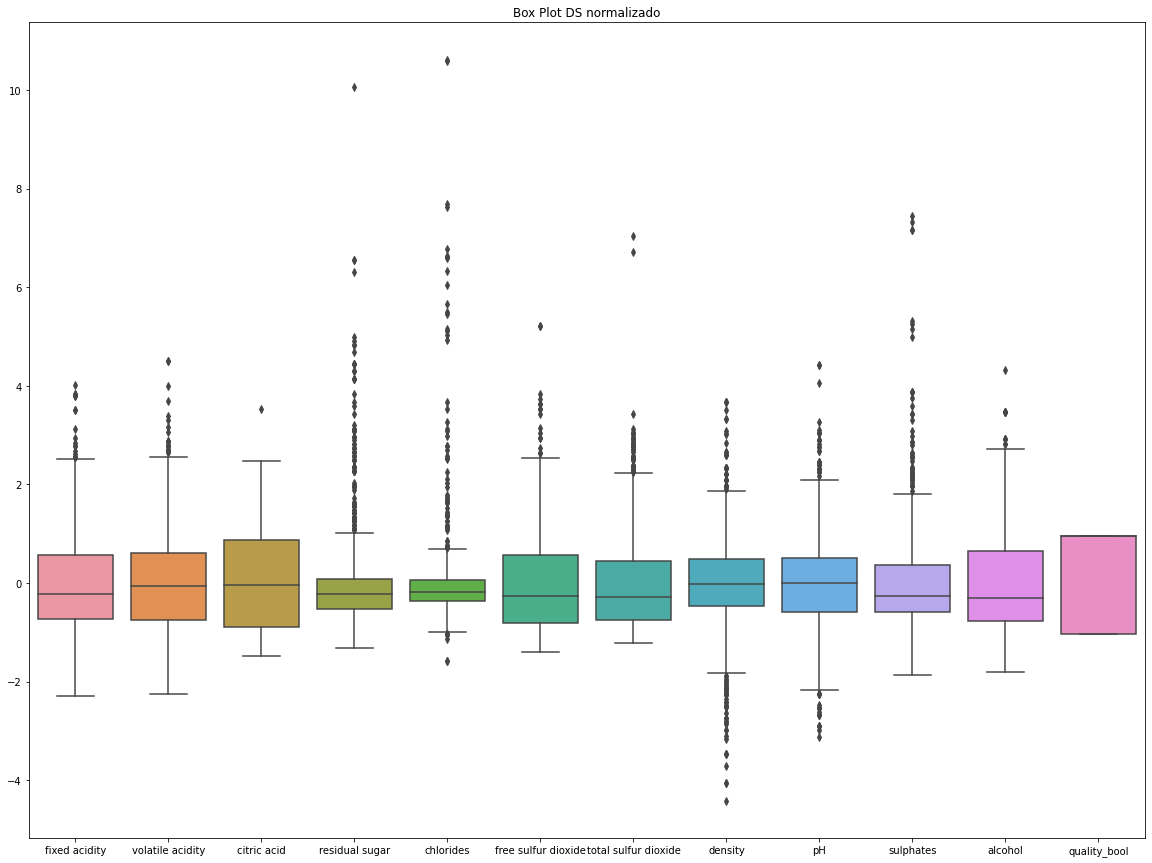

In [23]:
plt.figure(figsize=(20,15)),
sns.boxplot( data = df_geral_norm);
plt.title('Box Plot DS normalizado');

tamanho da amostra após tratamento de outliers 984


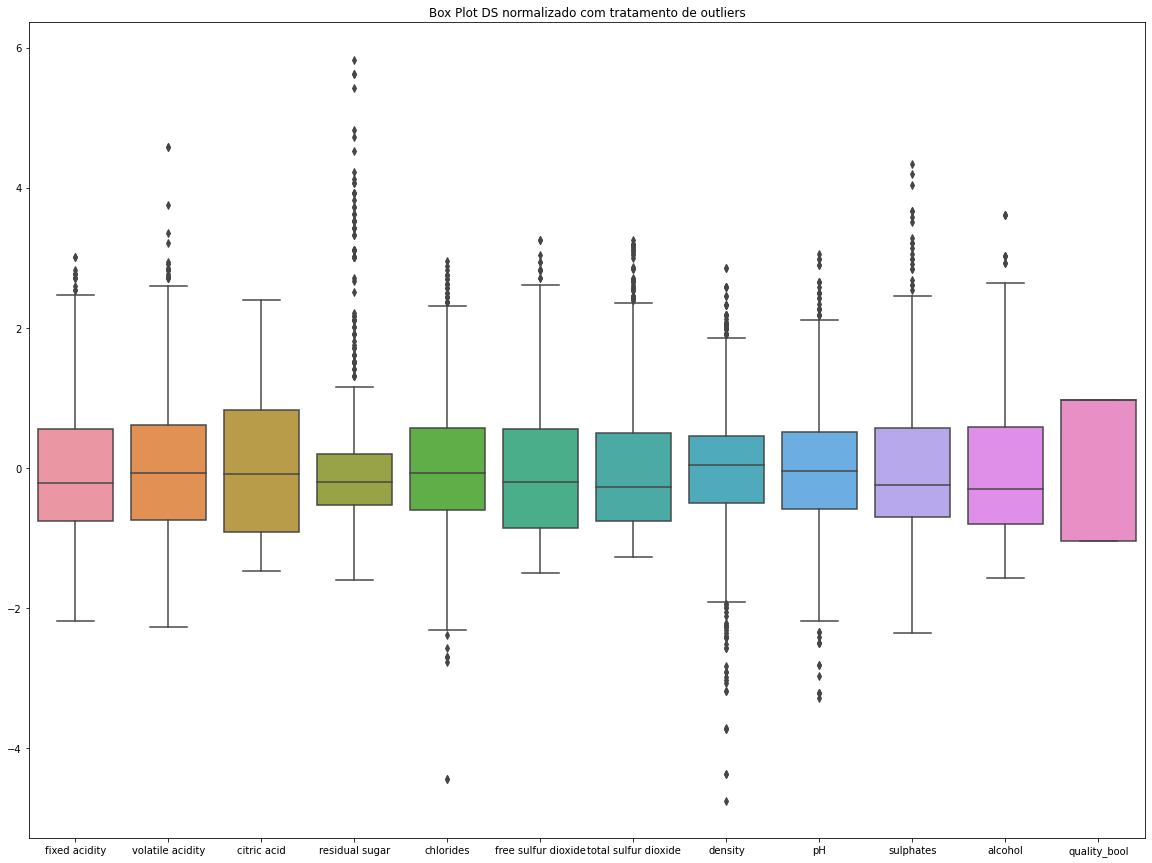

In [31]:
#tratando outliers
df_geral_free_out=df_geral.loc[(df_geral['total sulfur dioxide']<=np.percentile(df_geral['total sulfur dioxide'],99))&
                               (df_geral['residual sugar']<=np.percentile(df_geral['residual sugar'],99))&
                               (df_geral['free sulfur dioxide']<=np.percentile(df_geral['free sulfur dioxide'],99))&
                               (df_geral['fixed acidity']<=np.percentile(df_geral['fixed acidity'],99))&
                               (df_geral['sulphates']<=np.percentile(df_geral['sulphates'],99))&
                               (df_geral['density']<=np.percentile(df_geral['density'],99))&
                               (df_geral['chlorides']<=np.percentile(df_geral['chlorides'],95))&
                               (df_geral['pH']<=np.percentile(df_geral['pH'],99))]

#Normalizando para boxplot
df_geral_free_out_norm=df_geral_free_out.copy()
for column in df_geral_free_out.columns: 
    df_geral_free_out_norm[column] = (df_geral_free_out[column] -
                           df_geral_free_out[column].mean()) / df_geral_free_out[column].std()     
print('tamanho da amostra após tratamento de outliers',len(df_geral_free_out_norm))
plt.figure(figsize=(20,15)),
sns.boxplot( data = df_geral_free_out_norm);
plt.title('Box Plot DS normalizado com tratamento de outliers');

Como o dataset é pequeno, procuramos fazer um tratamento mínimo dos outliers, para não perder muita informação.

Abaixo Comparação entre o df sem outliers e original

In [32]:
df_geral_free_out.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,8.659248,0.521926,0.288039,2.496240,0.081050,14.869919,45.587398,0.997144,3.294573,0.643232,10.309553,0.518293
std,1.673671,0.176547,0.196319,0.995576,0.015565,9.247218,31.106984,0.001489,0.126045,0.132893,1.020328,0.499919
min,5.000000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.880000,0.330000,8.700000,0.000000
25%,7.400000,0.390000,0.110000,1.975000,0.071750,7.000000,22.000000,0.996400,3.220000,0.550000,9.500000,0.000000
50%,8.300000,0.510000,0.270000,2.300000,0.080000,13.000000,37.000000,0.997200,3.290000,0.610000,10.000000,1.000000
75%,9.600000,0.630000,0.450000,2.700000,0.090000,20.000000,61.000000,0.997820,3.360000,0.720000,10.900000,1.000000
max,13.700000,1.330000,0.760000,8.300000,0.127000,45.000000,147.000000,1.001400,3.680000,1.220000,14.000000,1.000000


In [33]:
df_geral.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,8.697636,0.522468,0.296609,2.585636,0.089919,15.220909,47.457273,0.997215,3.290473,0.666073,10.312091,0.520000
std,1.796350,0.179265,0.199428,1.284788,0.049086,10.128443,34.355829,0.001618,0.137955,0.179362,1.060169,0.499827
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,0.000000
25%,7.400000,0.390000,0.120000,1.900000,0.072000,7.000000,22.000000,0.996478,3.210000,0.560000,9.500000,0.000000
50%,8.300000,0.510000,0.290000,2.300000,0.081000,12.500000,38.000000,0.997200,3.290000,0.620000,10.000000,1.000000
75%,9.725000,0.630000,0.470000,2.700000,0.093000,21.000000,63.000000,0.998000,3.360000,0.732500,11.000000,1.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003150,3.900000,2.000000,14.900000,1.000000


## Relations features

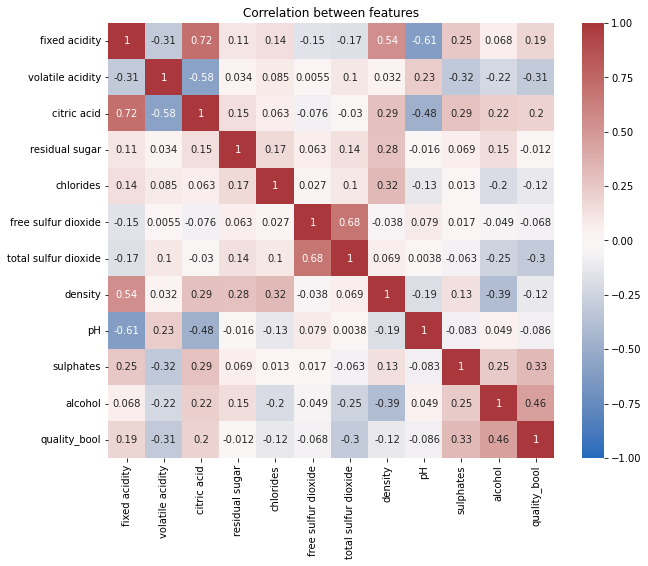

In [51]:
plt.figure(figsize=(10,8)),
sns.heatmap(df_geral_free_out.corr(),vmin=-1,vmax=1,annot=True,cmap='vlag');
plt.title('Correlation between features');

In [34]:
df_geral_free_out.corr().quality_bool.sort_values()

volatile acidity       -0.310713
total sulfur dioxide   -0.298403
density                -0.123515
chlorides              -0.120849
pH                     -0.085603
free sulfur dioxide    -0.067923
residual sugar         -0.012330
fixed acidity           0.192447
citric acid             0.197255
sulphates               0.330011
alcohol                 0.456967
quality_bool            1.000000
Name: quality_bool, dtype: float64

In [54]:
#Distribuições
sns.pairplot(df_geral_free_out,hue='quality_bool')
plt.title('Distribuition pair')

Output hidden; open in https://colab.research.google.com to view.

In [66]:
#Describe quality 1 com potenciais influenciadores na quality
df_geral_free_out.loc[(df_geral_free_out.quality_bool==1),['alcohol','total sulfur dioxide','volatile acidity','sulphates','quality_bool']].describe()

,alcohol,total sulfur dioxide,volatile acidity,sulphates,quality_bool
count,510.000000,510.000000,510.000000,510.000000,510.0
mean,10.758824,36.643137,0.469069,0.685490,1.0
std,1.097161,22.050534,0.164603,0.133515,0.0
min,8.700000,6.000000,0.120000,0.390000,1.0
25%,9.900000,20.000000,0.340000,0.580000,1.0
50%,10.700000,31.000000,0.440000,0.660000,1.0
75%,11.600000,48.000000,0.580000,0.770000,1.0
max,14.000000,114.000000,1.040000,1.180000,1.0


Vemos que quanto maior o nível de alcool mais provavel que o vinho seja bom.
Pois as medidas estatisticas nos mostram que 75% dos dados de vinho quality 1 tem alcohol >= 9.9, sendo que 8.7 < alcohol < 14

In [65]:
#Describe quality 0 com potenciais influenciadores na quality
df_geral_free_out.loc[(df_geral_free_out.quality_bool==0),['alcohol','total sulfur dioxide','volatile acidity','sulphates','quality_bool']].describe()

,alcohol,total sulfur dioxide,volatile acidity,sulphates,quality_bool
count,474.000000,474.000000,474.000000,474.000000,474.0
mean,9.826160,55.210970,0.578797,0.597764,0.0
std,0.645288,36.175719,0.171366,0.116285,0.0
min,9.000000,6.000000,0.210000,0.330000,0.0
25%,9.400000,26.000000,0.450000,0.530000,0.0
50%,9.600000,45.500000,0.575000,0.570000,0.0
75%,10.100000,81.750000,0.670000,0.640000,0.0
max,13.000000,147.000000,1.330000,1.220000,0.0


Vemos que quanto menor o nível de alcool mais provavel que o vinho seja quality 0. Pois as medidas estatisticas nos mostram que 75% dos dados de vinho quality 0 tem alcohol <= 10.1, sendo que 8.7< alcohol < 14

Agora Vamos Localizar os "contra exemplos" das tendencias acima constatadas. Ou seja, os outros 25%

In [82]:
#Localizando df alcohol <=9.2
df_geral_free_out.loc[(df_geral_free_out.alcohol<=9.2)&
                      (df_geral_free_out.quality_bool==1),['alcohol','total sulfur dioxide','volatile acidity','sulphates','quality_bool']].describe()
                    

,alcohol,total sulfur dioxide,volatile acidity,sulphates,quality_bool
count,32.00000,32.000000,32.000000,32.000000,32.0
mean,9.08125,37.968750,0.532188,0.629375,1.0
std,0.13545,19.187503,0.180067,0.130556,0.0
min,8.70000,10.000000,0.240000,0.470000,1.0
25%,9.00000,23.250000,0.420000,0.560000,1.0
50%,9.10000,37.000000,0.520000,0.600000,1.0
75%,9.20000,41.250000,0.630000,0.652500,1.0
max,9.20000,89.000000,1.000000,1.180000,1.0


Verificamos que mesmo o alcohol não indicando que a quality seria 1. Se verificarmos por exemplo total sulfur dioxide, vemos que suas medidas estão mais parecidas com os vinhos de quality 1.
<p>Ou seja, as features se complementam na predição

# Modelos e explorações

## Regressão Logística


In [120]:
#Vamos testar a Regressão logistica 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#selecionando feature
X=df_geral_free_out[['alcohol','total sulfur dioxide','volatile acidity','sulphates']]
y=df_geral_free_out.quality_bool
#Split, train e test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

#Imprime as Métricas 
print('Acurácia = ', accuracy_score(y_test, y_pred),
      '\nPrecisão = ', precision_score(y_test, y_pred),
      '\nRecall = ', recall_score(y_test, y_pred),
      '\nF1_SCORE = ', f1_score(y_test, y_pred))

Acurácia =  0.7905405405405406 
Precisão =  0.8571428571428571 
Recall =  0.7544910179640718 
F1_SCORE =  0.8025477707006368


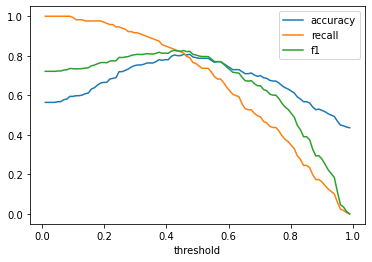

In [102]:
#Vamos Otimizar o limiar para máxima acurácia
clf = LogisticRegression()
clf.fit(x_train, y_train)

threshold_v = np.linspace(0.01, 0.99, 100)
acc_v = []
prec_v = []
recall_v = []
f1_v = []

for threshold in threshold_v:
    y_pred = clf.predict_proba(x_test)[:,1] > threshold

    acc_v.append(accuracy_score(y_test, y_pred))
    recall_v.append(recall_score(y_test, y_pred))
    f1_v.append(f1_score(y_test, y_pred))
    
plt.plot(threshold_v, acc_v, label='accuracy')
plt.plot(threshold_v, recall_v, label='recall')
plt.plot(threshold_v, f1_v, label='f1')
plt.xlabel('threshold')
plt.legend()

In [103]:
#Posição no gráfico acima onde acurácia é maxima
amaxg=np.where(acc_v==max(acc_v))[0][0]
amax=amaxg/100
print('threshold de acurácia maxima=',amax)

threshold de acurácia maxima= 0.45


In [132]:
#vamos refazer alterando  threshold
y_pred2 = clf.predict_proba(x_test)
pred2=[]

for i in range (len(x_test)):
  if y_pred2[i][1]>amax: #se a probabilidade de ser 1 for maior que 0.45
    pred2.append(1)
  else:
    pred2.append(0)

#Imprime as Métricas 

print('Acurácia = ', accuracy_score(y_test, pred2),
      '\nPrecisão = ', precision_score(y_test, pred2),
      '\nRecall = ', recall_score(y_test, pred2),
      '\nF1_SCORE = ', f1_score(y_test, pred2))

Acurácia =  0.8040540540540541 
Precisão =  0.8657718120805369 
Recall =  0.7724550898203593 
F1_SCORE =  0.8164556962025316


### Curva ROC e AUC

AUC:  0.8627860557953861


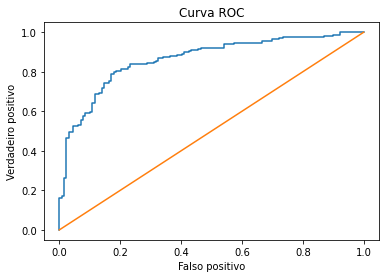

In [109]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred2[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('Falso positivo')
plt.ylabel('Verdadeiro positivo')
plt.title('Curva ROC');
print("AUC: ",auc(fpr, tpr))

## SVM - Support Vector Machine


In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#selecionando feature
x2=df_geral_free_out[['alcohol','total sulfur dioxide','volatile acidity','sulphates']]
y2=df_geral_free_out.quality_bool

#Split, train e test
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=0)

params = {
    'C': [0.1,1,10],
    'kernel': ['rbf', 'sigmoid', 'linear','poly']
}

gs = GridSearchCV(SVC(), params, cv = 5, verbose=0)
gs.fit(x2_train, y2_train)

y2_pred = gs.predict(x2_test)
y2_pred_train=gs.predict(x2_train)
print('\n best estimator: ',gs.best_estimator_)

#Metricas de avaliação de desempenho do modelo

target_names = ['class 0', 'class 1']
print('\n-----------\n',classification_report(y2_test, y2_pred, target_names=target_names))




 best estimator:  SVC(C=1, kernel='linear')

-----------
               precision    recall  f1-score   support

     class 0       0.72      0.88      0.79       129
     class 1       0.88      0.74      0.80       167

    accuracy                           0.80       296
   macro avg       0.80      0.81      0.80       296
weighted avg       0.81      0.80      0.80       296



## KNN


In [128]:
#Classificação KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
# tomando novamente o caso da classificação e olhando especificamente para o acuracia

# dividindo os dados em treino e teste
#selecionando feature
x2=df_geral_free_out[['alcohol','total sulfur dioxide','volatile acidity','sulphates']]
y2=df_geral_free_out.quality_bool

#Split, train e test
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=0)


cls = KNeighborsClassifier(n_neighbors=7) # instanciando o modelo
folds = KFold(100, shuffle=True)

results = cross_val_score(cls, x2, y2, scoring="accuracy", cv=folds)
print('média da acurácia:',results.mean())

média da acurácia: 0.6993333333333335


## Naive Beyes


Acurácia CategoricalNB: 0.7027027027027027
              precision    recall  f1-score   support

     class 0       0.64      0.71      0.68       129
     class 1       0.76      0.69      0.72       167

    accuracy                           0.70       296
   macro avg       0.70      0.70      0.70       296
weighted avg       0.71      0.70      0.70       296
 
-----------

Acurácia GaussianNB: 0.8074324324324325
              precision    recall  f1-score   support

     class 0       0.73      0.88      0.80       129
     class 1       0.89      0.75      0.82       167

    accuracy                           0.81       296
   macro avg       0.81      0.82      0.81       296
weighted avg       0.82      0.81      0.81       296



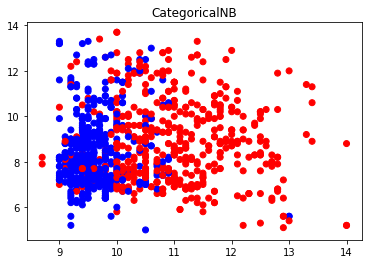

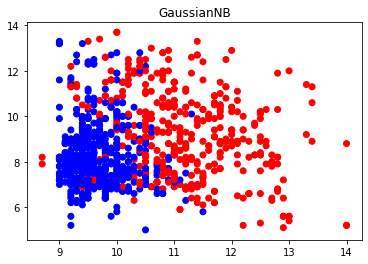

In [157]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split

#selecionando feature
x2=df_geral_free_out[['alcohol','total sulfur dioxide','volatile acidity','sulphates']]
y2=df_geral_free_out.quality_bool

#Split, train e test
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=0)

clf_c = CategoricalNB()
clf_c.fit(x2_train, y2_train)

#Usando o CategoricalNB realizamos a predição dos dados
y3_pred = clf_c.predict(x2_test)

print('Acurácia CategoricalNB:', accuracy_score(y3_pred, y2_test))
target_names = ['class 0', 'class 1']
print(classification_report(y2_test, y3_pred, target_names=target_names),'\n-----------\n')

cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(df_geral_free_out.alcohol, df_geral_free_out['fixed acidity'], c=clf_c.predict(x2), cmap=cmap)
plt.title('CategoricalNB')

clf_g = GaussianNB()
clf_g.fit(x2_train, y2_train)
y4_pred = clf_g.predict(x2_test)

print('Acurácia GaussianNB:', accuracy_score(y4_pred, y2_test))
#Metricas de avaliação de desempenho do modelo

target_names = ['class 0', 'class 1']
print(classification_report(y2_test, y4_pred, target_names=target_names))

plt.figure()
cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(df_geral_free_out.alcohol,df_geral_free_out['fixed acidity'], c=clf_g.predict(x2), cmap=cmap)
plt.title('GaussianNB')
plt.show()

# Aplicando o Modelo

## Loading and treatament

In [147]:
#Loading DF 
df_teste=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIDAMO/UNIDADE II/2-desafio-cidamo-2022-2/end_test.csv',sep=',')
df_teste.isnull().sum()

Unnamed: 0               0
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                 49
pH                      49
sulphates                0
alcohol                  0
dtype: int64

In [148]:
#Loading format df to submission
df_ex_submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIDAMO/UNIDADE II/2-desafio-cidamo-2022-2/ex_submission.csv',sep=',')
df_ex_submission=df_ex_submission.drop(['quality_bool'],axis=1)

In [149]:
df_teste['density'].fillna(df_teste['density'].median(), inplace=True)
df_teste['pH'].fillna(df_teste['pH'].median(), inplace=True)
df_teste.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

## Regressão Logistica

In [153]:
#selecionando a feature teste Regressão Logistica
x_teste=df_teste[['alcohol','total sulfur dioxide','volatile acidity','sulphates']]
#modelo já foi treinado, vamos testalo
y_predito = clf.predict_proba(x_teste)
y_predito_otimized=[]

for i in range (499):
  if y_predito[i][1]>amax: #se a probabilidade de ser 1 for maior que 0.43
    y_predito_otimized.append(1)
  else:
    y_predito_otimized.append(0)

#DF para regressão Logistica
df_y_predito2=pd.DataFrame(y_predito_otimized,columns=['quality_bool'])
df_submission=pd.concat([df_ex_submission,df_y_predito2], axis=1)
df_submission.columns=['id','quality_bool']
display(df_submission)

## SVM 

In [156]:
#selecionando feature SVM
x2_teste=df_teste[['alcohol','total sulfur dioxide','volatile acidity','sulphates']]

#teste
y2_predito = gs.predict(x2_teste)
y2_predito=y2_predito.astype(int)

#DF para SVM
df_y2_predito=pd.DataFrame(y2_predito,columns=['quality_bool'])
df_submission=pd.concat([df_ex_submission,df_y2_predito], axis=1)
df_submission.columns=['id','quality_bool']
df_submission

,id,quality_bool
0,1100,1
1,1101,1
2,1102,1
3,1103,1
4,1104,1
...,...,...
494,1594,0
495,1595,1
496,1596,1
497,1597,0


## Nayve Beyes Gaussian


In [158]:
#selecionando feature
x3_teste=df_teste[['alcohol','total sulfur dioxide','volatile acidity','sulphates']]

#teste
y3_predito = clf_g.predict(x2_teste)
y3_predito=y3_predito.astype(int)

#DF para NBG
df_y3_predito=pd.DataFrame(y3_predito,columns=['quality_bool'])
df_submission=pd.concat([df_ex_submission,df_y3_predito], axis=1)
df_submission.columns=['id','quality_bool']
df_submission

,id,quality_bool
0,1100,1
1,1101,1
2,1102,1
3,1103,1
4,1104,1
...,...,...
494,1594,0
495,1595,1
496,1596,1
497,1597,0


# To Submission

In [159]:
df_submission.to_csv('df_submission12.csv',index=False)